# 03 Scipy

This notebook will introduce some of the scipy functionality to you. In most cases these examples are limited to environmental applications and therefore only the relevant submodules of scipy will be introduced. The use of scipy always goes hand in hand with the numpy and pandas packages, therefore a basic knowledge of those is required. In most cases, the actual use of scipy can be broken down to only one line. The application of that specific function is right straitforward and the results or objects are known in most cases from the numpy and pandas library. The scientific understanding of *what* the method does is the main challenge when using the scipy package. This is also the way the name *scipy* has to be understood: the **sci**entific use of **py**thon.    

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

This notebook connects the <a href="https://datamarket.com/data/list/?q=provider%3Atsdl">Time Series Data Library</a> hosted by <a href="datamarket.com">datamarket.com</a>. As there is a Excel download API, we can utilize pandas to download the data and access the data using the DataFrame *values* property. Use the uncommented lines in the snippet below to save the Excel file and reopen it to avoid data traffic.

In [2]:
# set the data url
url = "https://datamarket.com/data/export/xlsx/?ds=2354"

# download the Excel file if needed
with open('download.xlsx', 'wb') as f:
    f.write(requests.get(url).content)

df = pd.read_excel('download.xlsx', skiprows=11)

# df = pd.read_excel(url, skiprows=11)

Get rid of the extra column, set the index and extract only the discharge measurements into a numpy array.

In [3]:
df.drop('Unnamed: 2', axis=1, inplace=True)
df.columns = ['Date', 'Discharge']
df.set_index('Date', inplace=True)

In [4]:
ts = df.values.flatten()
ts[:10]

array([ 0.19 ,  0.167,  0.157,  0.132,  0.106,  0.1  ,  0.098,  0.103,
        0.097,  0.095])

### basic statistics 

In order to get a first impression of the data set, use numpy to calculate some statistical moments and a histogram .

In [5]:
print('N:\t', len(ts))
print('mean:\t', np.mean(ts))
print('min:\t', np.min(ts))
print('max:\t', np.max(ts))
print('std:\t', np.std(ts))
print('75%:\t', np.percentile(ts, 75))
print('25%:\t', np.percentile(ts, 25))
print('median:\t', np.median(ts))

N:	 1461
mean:	 0.590552361396
min:	 0.034
max:	 24.3
std:	 1.79133401039
75%:	 0.333
25%:	 0.103
median:	 0.178


In [6]:
from scipy.stats import describe
describe(ts)

DescribeResult(nobs=1461, minmax=(0.034000000000000002, 24.300000000000001), mean=0.59055236139630396, variance=3.2110753981125701, skewness=7.877241025931549, kurtosis=77.09586421629918)

In [7]:
df.describe()

,Discharge
count,1461.000000
mean,0.590552
std,1.791947
min,0.034000
25%,0.103000
50%,0.178000
75%,0.333000
max,24.300000


[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2. ]


<Container object of 10 artists>

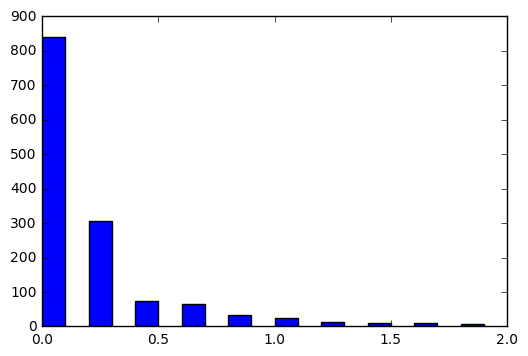

In [8]:
edge, amt = np.histogram(ts, range=(0, 2.))[::-1]
print(edge)
plt.bar(edge[:-1], amt, width=0.1)

##### Kernel Density estimate

Instead of a histogram, a **K**erndel **D**ensity **E**stimation could be used to produce visually better results. This might give a better visual impression of the underlying distribution in the discharge data.

In [9]:
from scipy.stats import gaussian_kde

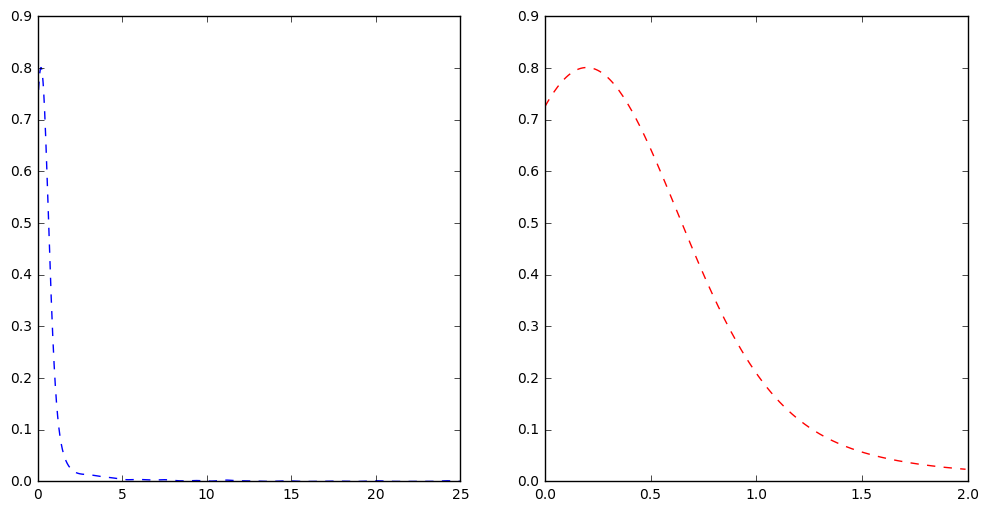

In [10]:
# build a figure
f, axes = plt.subplots(1,2, figsize=(12, 6))

# estimate 
KDE = gaussian_kde(ts)

# full range and limited to 2
x = np.arange(0,25, 0.01)
x2 = np.arange(0, 2, 0.01)

# plot
axes[0].plot(x, KDE.evaluate(x), '--b')
axes[1].plot(x2, KDE.evaluate(x2), '--r')

##### Fit a distribution 

The scipy package includes the *stats* submodule, which can be used to fit almost any distribution to the sample. With an distribution object instantiated, probability functions along with cumulative functions and point probability functions are available.

In [11]:
from scipy.stats import invgauss, invweibull

Many of the the distribution modules in scipy can calculate the statistical moments, *while assuming this distribution for the sample*. In case this assumption is wrong, the moments will be error prone.

In [12]:
# expected value
mu = np.mean(ts)

# mean, variance, skewness, kurtousis
invgauss.stats(mu, moments='mvsk')

(array(0.590552361396304),
 array(0.20595637120719587),
 array(2.305422141944233),
 array(8.85828542094456))

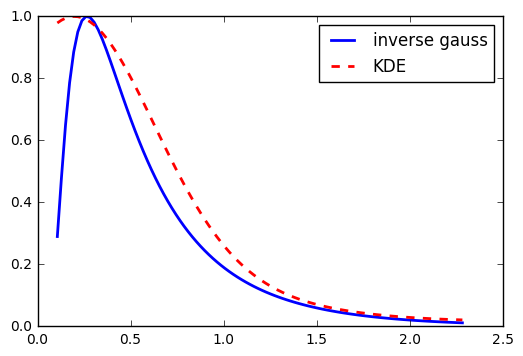

In [13]:
fig, ax = plt.subplots(1,1)

# align 100 steps between smallest and highest 
x = np.linspace(invgauss.ppf(0.01, mu), invgauss.ppf(0.99, mu), 100)

# calculate the gaus PDF and KDE
y = invgauss.pdf(x, mu)
y2 = KDE.evaluate(x)
ax.plot(x, y / np.max(y), label='inverse gauss', lw=2, color='blue')
ax.plot(x, y2 / np.max(y2), label='KDE', lw=2, linestyle='--', color='red')
plt.legend()

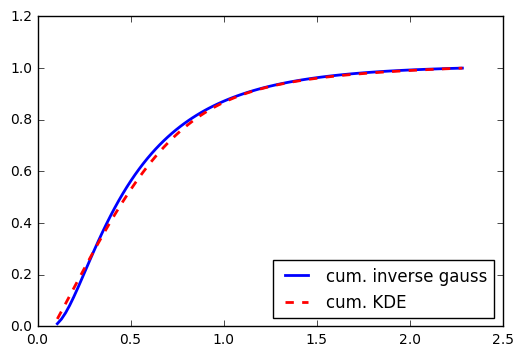

In [14]:
# or cumumlative
fig, ax = plt.subplots(1,1)

ax.plot(x, np.cumsum(y / np.sum(y)), label='cum. inverse gauss', lw=2, color='blue')
ax.plot(x, np.cumsum(y2 / np.sum(y2)), label='cum. KDE', lw=2, linestyle='--', color='red')
plt.legend(loc='lower right')

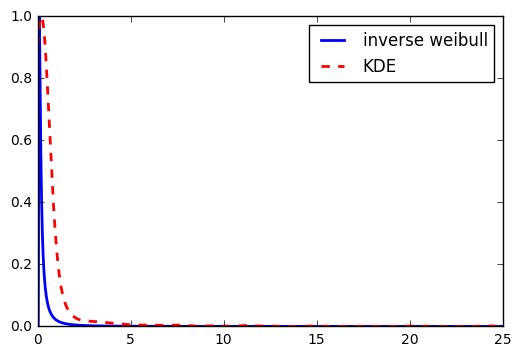

In [15]:
fig, ax = plt.subplots(1,1)

# plot again on 0 < x 25
x = np.arange(0, 25, 0.01)

# calculate the gaus PDF and KDE
y = invweibull.pdf(x, *invweibull.fit(ts))
y2 = KDE.evaluate(x)
ax.plot(x, y / np.max(y), label='inverse weibull', lw=2, color='blue')
ax.plot(x, y2 / np.max(y2), label='KDE', lw=2, linestyle='--', color='red')
plt.legend()

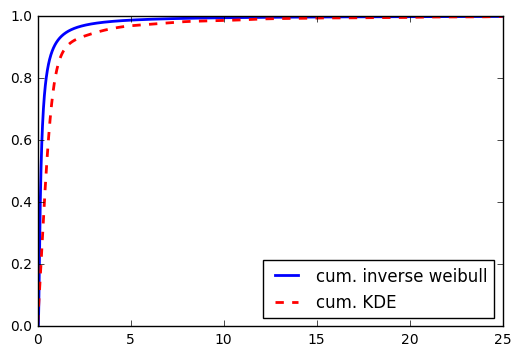

In [16]:
fig, ax = plt.subplots(1,1)

# plot again on 0 < x 25
x = np.arange(0, 25, 0.01)

# calculate the gaus PDF and KDE
y = invweibull.pdf(x, *invweibull.fit(ts))
y2 = KDE.evaluate(x)
ax.plot(x, np.cumsum(y / np.sum(y)), label='cum. inverse weibull', lw=2, color='blue')
ax.plot(x, np.cumsum(y2 / np.sum(y2)), label='cum. KDE', lw=2, linestyle='--', color='red')
plt.legend(loc='lower right')

##### Autocorrelation

In order to produce some insights on autocorrelation in our timeseries, we need the differences observed between the points. This differences data set could also be a starting point for a simplification algorithm, trying to minimize the amount of points needed to describe the signal without loosing significant information. However, when utilizing the autocorrelation and lag plot distributed by the pandas package, we can just pass the data to these functions.

In [17]:
# the differences can be calculated with the DataFrame's diff function
print(df.head())
print(df.diff().head())

            Discharge
Date                 
1988-01-01      0.190
1988-01-02      0.167
1988-01-03      0.157
1988-01-04      0.132
1988-01-05      0.106
            Discharge
Date                 
1988-01-01        NaN
1988-01-02     -0.023
1988-01-03     -0.010
1988-01-04     -0.025
1988-01-05     -0.026


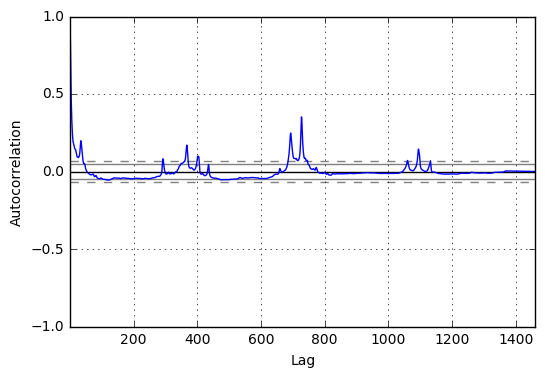

In [18]:
from pandas.tools.plotting import autocorrelation_plot, lag_plot
autocorrelation_plot(ts)

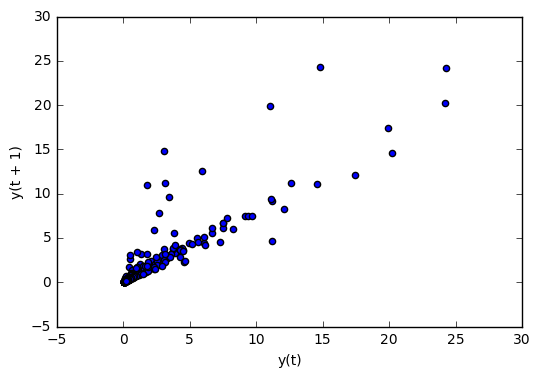

In [19]:
lag_plot(pd.Series(ts))

## Hydrological Statistics

As we are operating on discharge data, there are some additional basic statistics, which we should consider. Nevertheless, these are specific to discharge data and cannot be transfered to any kind of environmental data. We will have a closer look into a flow duration diagram and the discharge regime. For aggregating the pandas library is quite handy, which utilizes a lot of the scipy functions while calculating binned statistics. Remember the autocorrelation plot shown earlier. There are better ways to calaculate returning periods in discharge data, which make use of a flow duration diagram.

### Discharge Regime 

In [20]:
from datetime import datetime
index = np.fromiter(map(lambda date: int(datetime.strftime(date, '%m')), df.index), dtype=int)
print(np.unique(index))
print(index[:5], index[5:])

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[1 1 1 1 1] [ 1  1  1 ..., 12 12 12]


In [21]:
regime = [np.mean(ts[np.where(index==i)]) for i in np.unique(index)]
dict(zip(np.unique(index), regime))

{1: 0.080862903225806443,
 2: 0.081796460176991159,
 3: 0.22877419354838707,
 4: 3.2599166666666668,
 5: 1.5774919354838708,
 6: 0.70852499999999996,
 7: 0.32383064516129034,
 8: 0.15715322580645164,
 9: 0.163325,
 10: 0.18092741935483869,
 11: 0.21325000000000002,
 12: 0.1296048387096774}

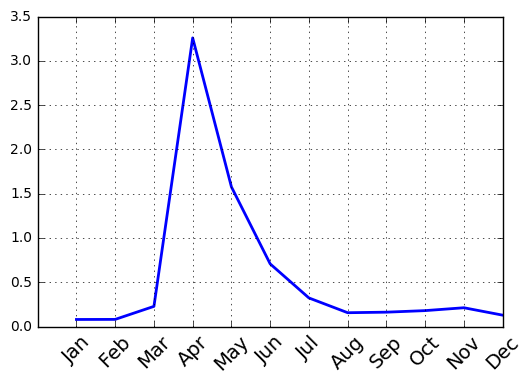

In [22]:
fig, ax = plt.subplots(1,1)

#plot
ax.plot(np.unique(index), regime, '-b', lw=2)
plt.xticks(rotation=45)
ax.set_xticks(np.unique(index))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.grid()

### Flow Duration Curve 

For a flow duration curve, the observations have to be ordered descending. By ranking the data based on this sorting the Weibull empirical non-exceeding probability can be calculated.
$$ p(r) = \frac{r}{1 + N} $$
where r is the rank and N the sample size.

In [23]:
from scipy.stats import rankdata

# calc N
N = len(ts)

# calc ranks
ranks = rankdata(ts, method='average')
ranks[:10]

array([ 802. ,  651.5,  592. ,  469.5,  384. ,  333. ,  315.5,  362. ,
        306. ,  292. ])

In [24]:
# apply weibulls formula
p = np.fromiter(map(lambda r: 1 -(r / (1 + N)), ranks), dtype=np.float)
#p.sort()

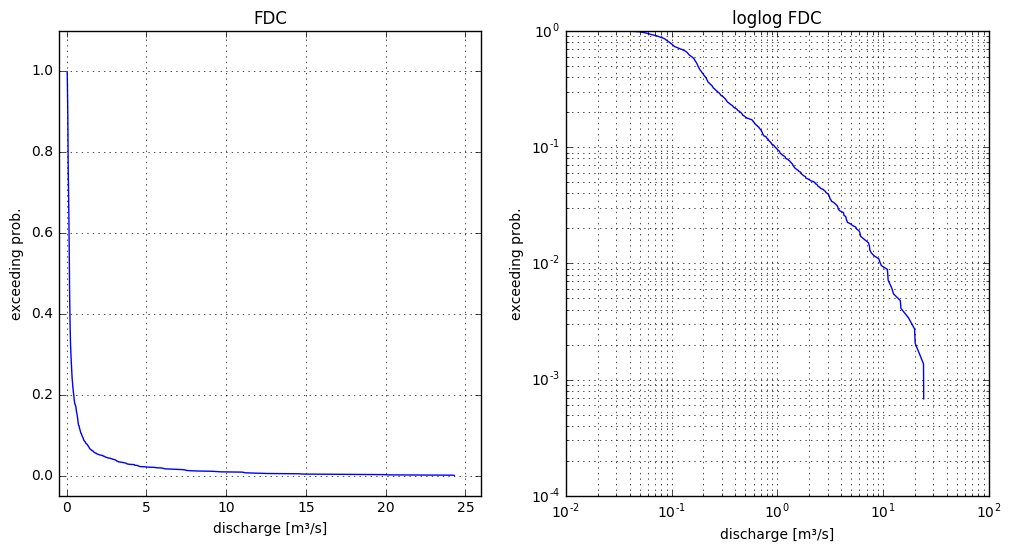

In [25]:
f, axes = plt.subplots(1,2, figsize=(12,6))

# index for sorting
i = np.argsort(p)

# plot sorted
axes[0].plot(ts[i], p[i], '-b')
axes[0].set_ylabel('exceeding prob.')
axes[0].set_xlabel('discharge [m³/s]')
axes[0].set_ylim((-0.05, 1.1))
axes[0].set_xlim((-0.5, 26))
axes[0].set_title('FDC')
axes[0].grid(which='major')

# plot logarithmic
axes[1].loglog()
axes[1].plot(ts[i], p[i], '-b')
axes[1].set_ylabel('exceeding prob.')
axes[1].set_xlabel('discharge [m³/s]')
axes[1].set_title('loglog FDC')
axes[1].grid(which='both')

# Solution for excercise

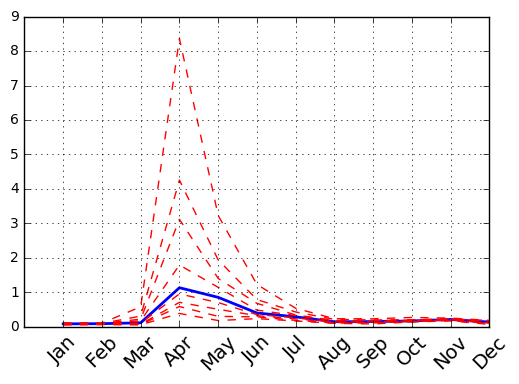

In [26]:
# get the median
m = [np.median(ts[np.where(index==i)]) for i in np.unique(index)]

# get the n-quantiles
quantiles = [[np.percentile(ts[np.where(index==i)], qu) for i in np.unique(index)] for qu in  [10,20,30,40,60,70,80,90]]

# plot
fig, ax = plt.subplots(1,1)

#plot
ax.plot(np.unique(index), m, '-b', lw=2)
for qu in quantiles:
    ax.plot(np.unique(index), qu, '--r')
plt.xticks(rotation=45)
ax.set_xticks(np.unique(index))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.grid()